In [34]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.ticker as tic
from make_byr_cmap import make_byr_cmap


from pprint import pprint

In [35]:
ds = xr.open_dataset('../../../../data/netcdf_files/uv300.nc')

In [36]:
U = ds.U[1,:,:]



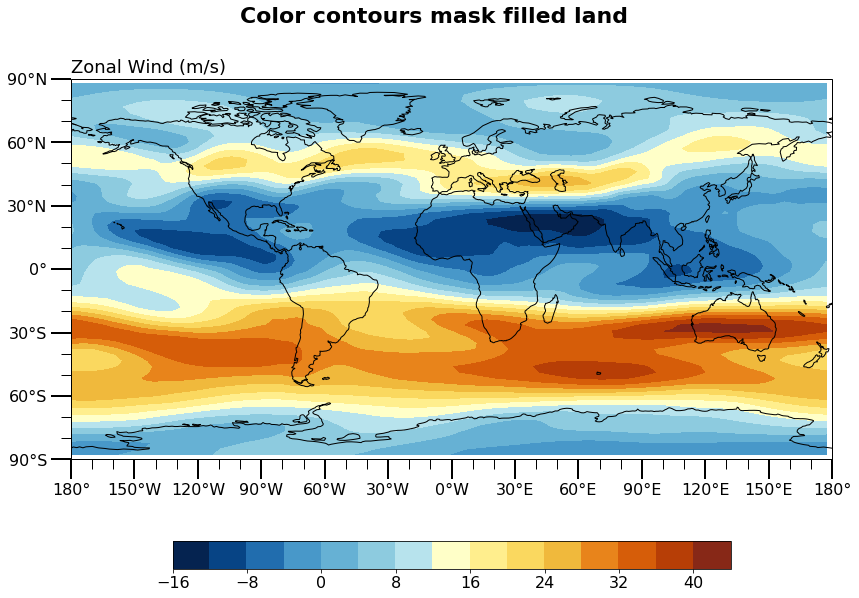

In [38]:
plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()
fig.suptitle('Color contours mask filled land', fontsize=22, fontweight='bold')

projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

#
# Use global map, which leaves a gap at end of plot. This data set isn't truly global.
#
ax.set_global()
ax.coastlines()

# 
# Hard-code tic values. This assumes data are global
#
ax.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax.set_yticks(np.linspace(-90, 90, 7), crs=projection)

# 
# Use cartopy's lat and lon formatter to get tic values displayed in degrees
#
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#
# Tweak minor tic marks. Set spacing so we get nice round values (10 degrees). Again, assumes global data
#
ax.tick_params(labelsize=16)
ax.minorticks_on()
ax.xaxis.set_minor_locator(tic.AutoMinorLocator(n=3))
ax.yaxis.set_minor_locator(tic.AutoMinorLocator(n=3))
ax.tick_params('both', length=20, width=2, which='major')
ax.tick_params('both', length=10, width=1, which='minor')

#
# Import an NCL colormap
#
newcmp = make_byr_cmap()


#
# Plot the data. Note, min and max contour levels are hard-coded. plot.contour's automatic contour value selector produces
# fractional values. Yuck
#
p = U.plot.contourf(ax=ax, vmin=-16.0, vmax=44, levels=16, cmap=newcmp, add_colorbar=False, transform=projection, extend='neither')

cbar = plt.colorbar(p, orientation='horizontal', shrink=0.5)
cbar.ax.tick_params(labelsize=16)

#
# Disable axis labels provided by xarray (I think)
#
ax.set_xlabel('')
ax.set_ylabel('')

#
# add a title to the plot axes. What happens if xarray data set doesn't have long_name and units?
#
ax.set_title(U.long_name + ' (' + U.units+')', fontsize=18, loc='left')
plt.title('') # Someone (xarray?) generates their own title



plt.show()

